# Funnel optimisation (with interaction effects)

**Key finding**

When prioritising variables in a funnel, <u>interactions (correlations) are all that matters, and the absolute value of the variables is irrelevant</u>.

**Partial Derivatives with $\rho$ Interaction**

For the utility function $U(A, B, C, D)$, the partial derivatives with the interactions $\rho$  are:

$$
\frac{\partial U}{\partial A} = B \cdot C \cdot D \cdot \left(1 + \rho_{AB} + \rho_{AC} + \rho_{AD}\right)
$$

$$
\frac{\partial U}{\partial B} = A \cdot C \cdot D \cdot \left(1 + \rho_{BA} + \rho_{BC} + \rho_{BD}\right)
$$

$$
\frac{\partial U}{\partial C} = A \cdot B \cdot D \cdot \left(1 + \rho_{CA} + \rho_{CB} + \rho_{CD}\right)
$$

$$
\frac{\partial U}{\partial D} = A \cdot B \cdot C \cdot \left(1 + \rho_{DA} + \rho_{DB} + \rho_{DC}\right)
$$

**Elasticities with $\rho$ Interaction**

For the utility function $U(A, B, C, D)$, the elasticities with the interactions $\rho$  are:

$$
\epsilon_A = \frac{\partial U}{\partial A} \cdot \frac{A}{U} = \left(B \cdot C \cdot D \cdot \left(1 + \rho_{AB} + \rho_{AC} + \rho_{AD}\right)\right) \cdot \frac{A}{A \cdot B \cdot C \cdot D} = 1 + \rho_{AB} + \rho_{AC} + \rho_{AD}
$$

$$
\epsilon_B = \frac{\partial U}{\partial B} \cdot \frac{B}{U} = \left(A \cdot C \cdot D \cdot \left(1 + \rho_{BA} + \rho_{BC} + \rho_{BD}\right)\right) \cdot \frac{B}{A \cdot B \cdot C \cdot D} = 1 + \rho_{BA} + \rho_{BC} + \rho_{BD}
$$

$$
\epsilon_C = \frac{\partial U}{\partial C} \cdot \frac{C}{U} = \left(A \cdot B \cdot D \cdot \left(1 + \rho_{CA} + \rho_{CB} + \rho_{CD}\right)\right) \cdot \frac{C}{A \cdot B \cdot C \cdot D} = 1 + \rho_{CA} + \rho_{CB} + \rho_{CD}
$$

$$
\epsilon_D = \frac{\partial U}{\partial D} \cdot \frac{D}{U} = \left(A \cdot B \cdot C \cdot \left(1 + \rho_{DA} + \rho_{DB} + \rho_{DC}\right)\right) \cdot \frac{D}{A \cdot B \cdot C \cdot D} = 1 + \rho_{DA} + \rho_{DB} + \rho_{DC}
$$



## Create fake data

In [28]:
import numpy as np
import pandas as pd

def create_fake_data():
    # Simulation parameters
    T = 52  # Number of time steps
    dt = 1/52  # Time step size (weekly steps)

    # GBM parameters for A
    mu_A = 0.5  # Drift
    sigma_A = 0.1  # Volatility
    A0 = 70000  # Initial Value

    # Geometric OU parameters for B, C, D
    theta_B, mu_B, sigma_B = 0.1, 0.04, 0.05  # Mean Reversion Speed, Long-term Mean, Volatility
    theta_C, mu_C, sigma_C = 0.1, 0.03, 0.05  # Mean Reversion Speed, Long-term Mean, Volatility
    theta_D, mu_D, sigma_D = 0.1, 260, 0.2  # Mean Reversion Speed, Long-term Mean, Volatility

    # Initialize arrays to store the simulated data
    A = np.zeros(T)
    B = np.zeros(T)
    C = np.zeros(T)
    D = np.zeros(T)
    time = np.arange(T)

    # Initial values
    A[0] = A0
    B[0] = np.log(mu_B)  # Log transform for Geometric OU
    C[0] = np.log(mu_C)  # Log transform for Geometric OU
    D[0] = np.log(mu_D)  # Log transform for Geometric OU

    # Simulate the GBM and Geometric OU processes
    for t in range(1, T):
        A[t] = A[t-1] * np.exp((mu_A - 0.5 * sigma_A**2) * dt + sigma_A * np.sqrt(dt) * np.random.normal())
        B[t] = B[t-1] + theta_B * (np.log(mu_B) - B[t-1]) * dt + sigma_B * np.sqrt(dt) * np.random.normal()
        C[t] = C[t-1] + theta_C * (np.log(mu_C) - C[t-1]) * dt + sigma_C * np.sqrt(dt) * np.random.normal()
        D[t] = D[t-1] + theta_D * (np.log(mu_D) - D[t-1]) * dt + sigma_D * np.sqrt(dt) * np.random.normal()

    # Exponentiate to get the geometric values
    B = np.exp(B)
    C = np.exp(C)
    D = np.exp(D)

    # Create a DataFrame for the simulated data
    data = pd.DataFrame({'Time': time, 'A': A, 'B': B, 'C': C, 'D': D})
    return data

# Generate the fake data
data = create_fake_data()
data

,Time,A,B,C,D
0,0,70000.000000,0.040000,0.030000,260.000000
1,1,70925.959167,0.040166,0.029517,256.678792
2,2,71737.385683,0.039948,0.029596,260.758426
3,3,72893.681403,0.040080,0.029827,255.756285
4,4,74717.422238,0.039977,0.030086,273.063218
5,5,76598.073297,0.039978,0.030117,277.584046
6,6,77091.370230,0.040016,0.030272,284.412915
7,7,77436.521781,0.040177,0.030119,285.857999
8,8,78240.694550,0.040061,0.029967,286.059223
9,9,79855.639759,0.039512,0.029772,281.827654


/opt/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

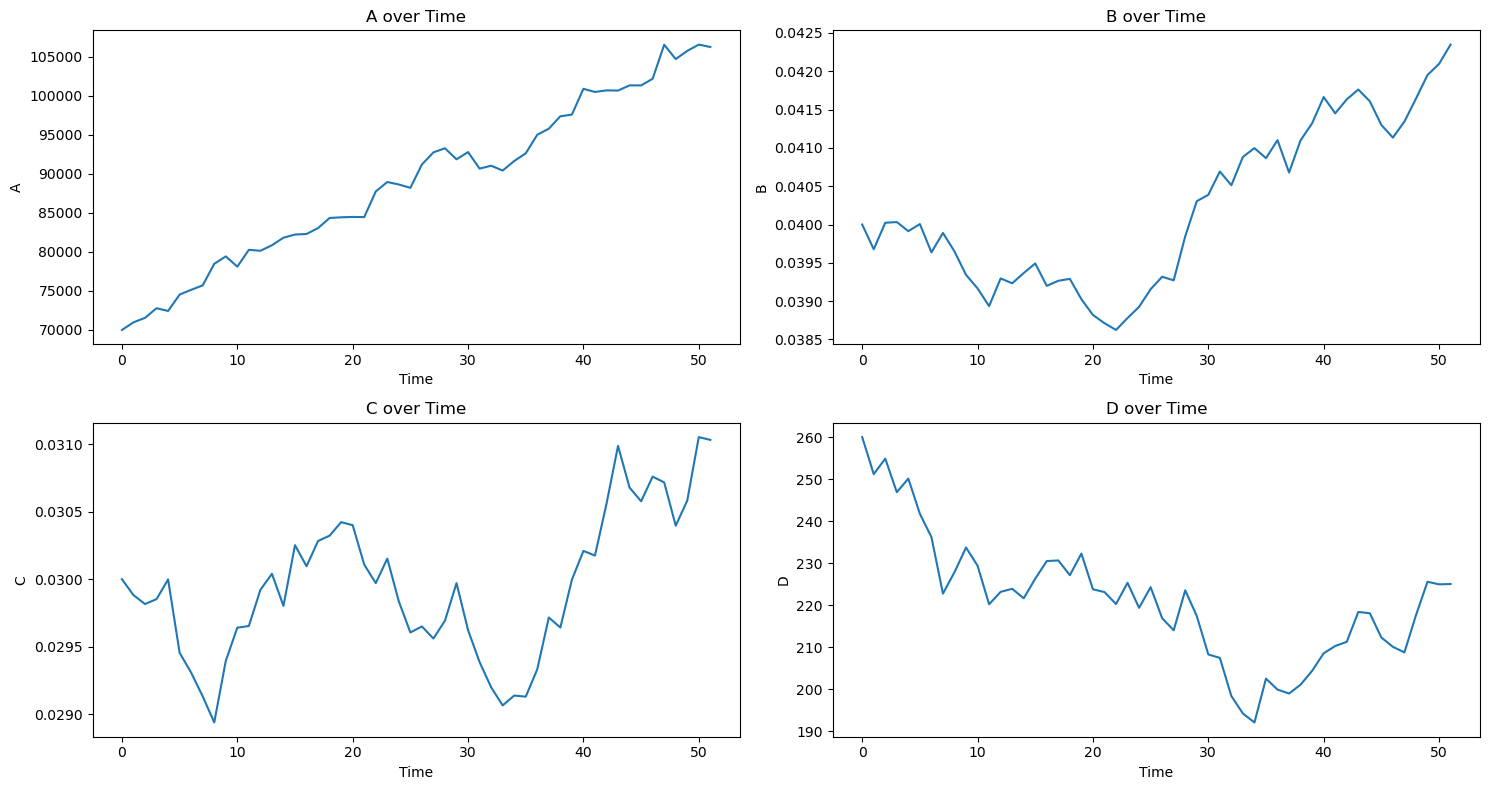

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_ts(data):
    # Number of variables to plot
    num_vars = data.shape[1] - 1  # Exclude the 'Time' column
    
    # Calculate grid size
    num_cols = 2  # Number of columns in the grid
    num_rows = (num_vars + num_cols - 1) // num_cols  # Number of rows in the grid
    
    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
    axes = axes.flatten()  # Flatten the axes array for easy iteration
    
    # Plot each variable in a subplot
    for i, col in enumerate(data.columns[1:]):  # Exclude the 'Time' column
        sns.lineplot(x=data['Time'], y=data[col], ax=axes[i])
        axes[i].set_title(f'{col} over Time')
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel(col)
    
    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Example usage with the generated data
data = create_fake_data()
plot_ts(data)

## Correlations

Correlation Matrix:
A:
  A: 1.0
  B: -0.64
  C: -0.81
  D: -0.64

B:
  A: -0.64
  B: 1.0
  C: 0.29
  D: 0.17

C:
  A: -0.81
  B: 0.29
  C: 1.0
  D: 0.78

D:
  A: -0.64
  B: 0.17
  C: 0.78
  D: 1.0



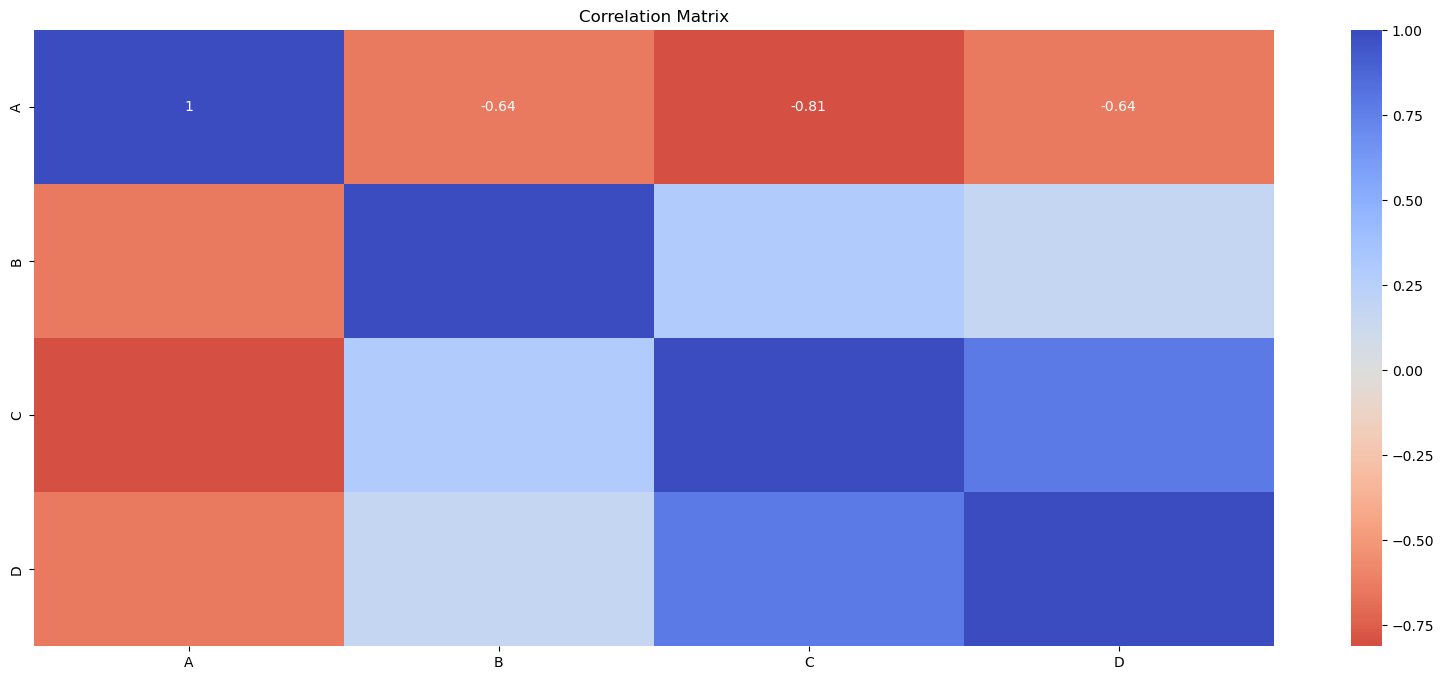

/opt/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

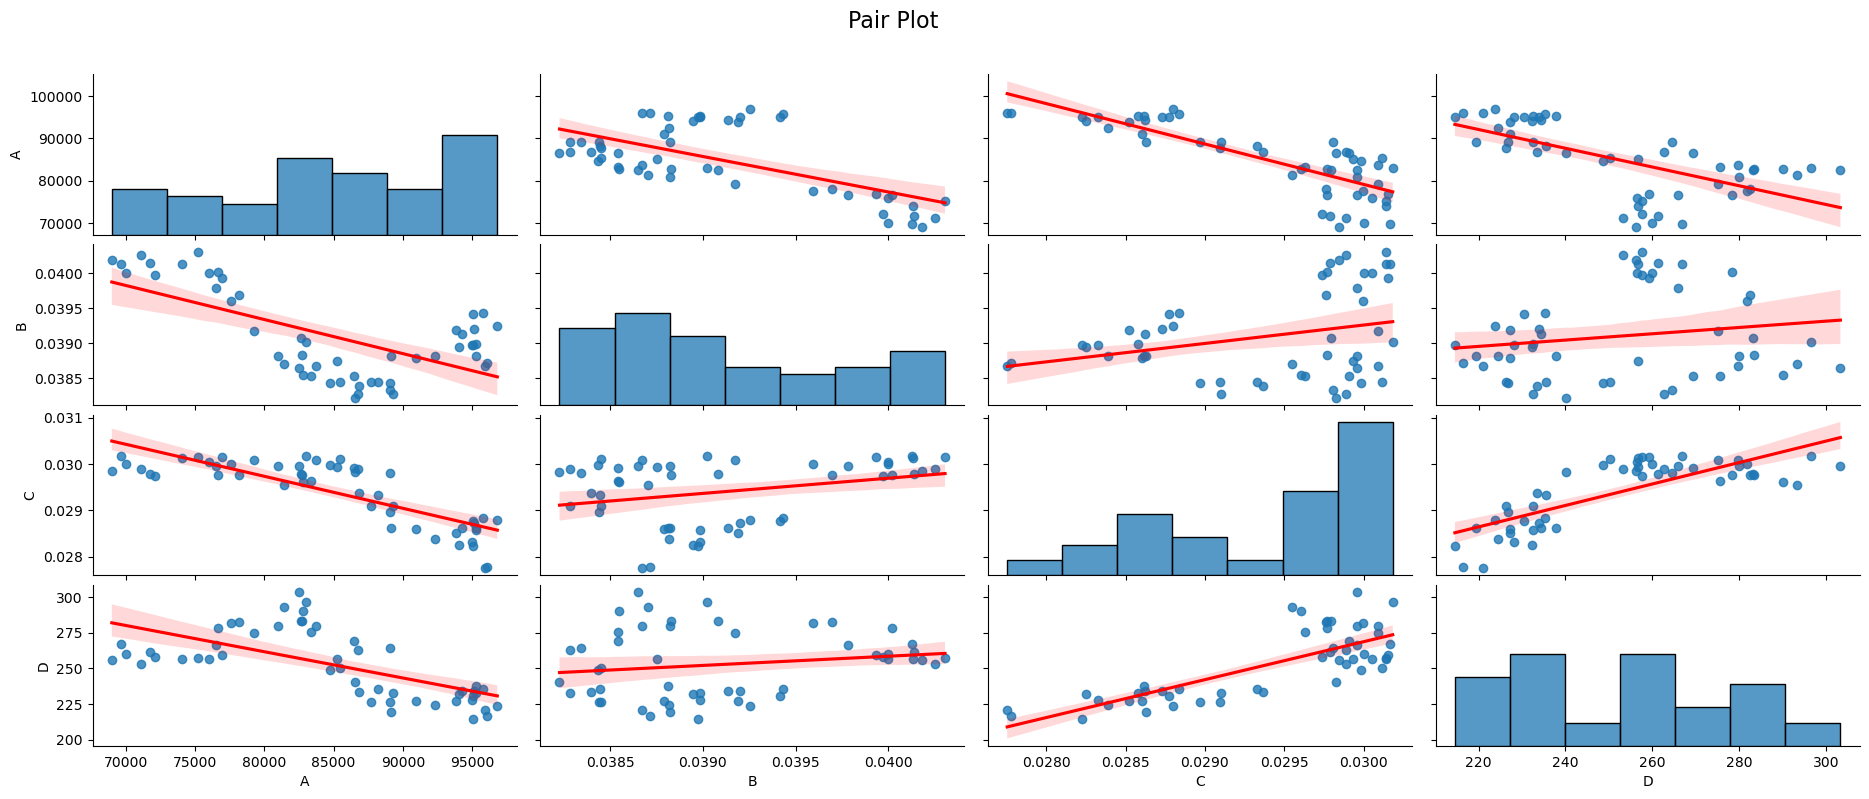


rho_data:
{'Traffic': {'Traffic': 1.0, 'FreeConversion': -0.6374720494238114, 'PaidConversion': -0.8121984638146535, 'Price': -0.6383223488758506}, 'FreeConversion': {'Traffic': -0.6374720494238114, 'FreeConversion': 1.0, 'PaidConversion': 0.293209582252119, 'Price': 0.1701329779254585}, 'PaidConversion': {'Traffic': -0.8121984638146535, 'FreeConversion': 0.293209582252119, 'PaidConversion': 1.0, 'Price': 0.7849234027534304}, 'Price': {'Traffic': -0.6383223488758506, 'FreeConversion': 0.1701329779254585, 'PaidConversion': 0.7849234027534304, 'Price': 1.0}}


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def format_corr_dict(corr_dict):
    formatted_dict = {}
    for key, value in corr_dict.items():
        formatted_dict[key] = {k: round(v, 2) for k, v in value.items()}
    return formatted_dict

def print_corr_dict(corr_dict):
    formatted_dict = format_corr_dict(corr_dict)
    for key, value in formatted_dict.items():
        print(f"{key}:")
        for sub_key, sub_value in value.items():
            print(f"  {sub_key}: {sub_value}")
        print()

def format_percentage_axes(ax, variables):
    for var in variables:
        if ax.get_xlim()[0] == 0 and ax.get_xlim()[1] <= 1:
            ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
        if ax.get_ylim()[0] == 0 and ax.get_ylim()[1] <= 1:
            ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

def correlations(data):
    # Drop the 'Time' column if it exists
    if 'Time' in data.columns:
        data = data.drop(columns=['Time'])
    
    # Compute the correlation matrix
    corr_matrix = data.corr()
    
    # Convert the correlation matrix to a dictionary
    corr_dict = corr_matrix.to_dict()
    
    # Print the correlation matrix in a readable format
    print("Correlation Matrix:")
    print_corr_dict(corr_dict)
    
    # Plot the correlation matrix
    plt.figure(figsize=(20, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm_r', center=0, cbar=True)
    plt.title('Correlation Matrix')
    plt.show()
    
    # Create pair plot with linear regression lines
    pair_plot = sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'red'}})
    pair_plot.fig.set_size_inches(20, 8)
    pair_plot.fig.subplots_adjust(top=0.9)  # adjust the Figure in pair_plot
    pair_plot.fig.suptitle('Pair Plot', fontsize=16)
    
    # Format axes if range is between 0 and 1
    for ax in pair_plot.axes.flatten():
        if ax is not None:
            format_percentage_axes(ax, data.columns)

    plt.show()
    
    # Map variables to Traffic, FreeConversion, PaidConversion, Price
    variable_mapping = {'A': 'Traffic', 'B': 'FreeConversion', 'C': 'PaidConversion', 'D': 'Price'}
    reverse_mapping = {v: k for k, v in variable_mapping.items()}
    rho_data = {variable_mapping[k]: {variable_mapping[sub_k]: v for sub_k, v in sub_v.items()} for k, sub_v in corr_dict.items() if k in variable_mapping}

    # Return the rho_data object
    return rho_data

# Example usage with the generated data
data = create_fake_data()
rho_data = correlations(data)
print("\nrho_data:")
print(rho_data)

## Sensitivity Analysis

Total Sensitivity with respect to Traffic: $0
Total Sensitivity with respect to Free Conversion: $966,268
Total Sensitivity with respect to Paid Conversion: $987,429
Total Sensitivity with respect to Price: $119

Elasticity with respect to Traffic: -1.1
Elasticity with respect to Free Conversion: 0.8
Elasticity with respect to Paid Conversion: 1.3
Elasticity with respect to Price: 1.3

Analytical Elasticity with respect to Traffic: -1.1
Analytical Elasticity with respect to Free Conversion: 0.8
Analytical Elasticity with respect to Paid Conversion: 1.3
Analytical Elasticity with respect to Price: 1.3


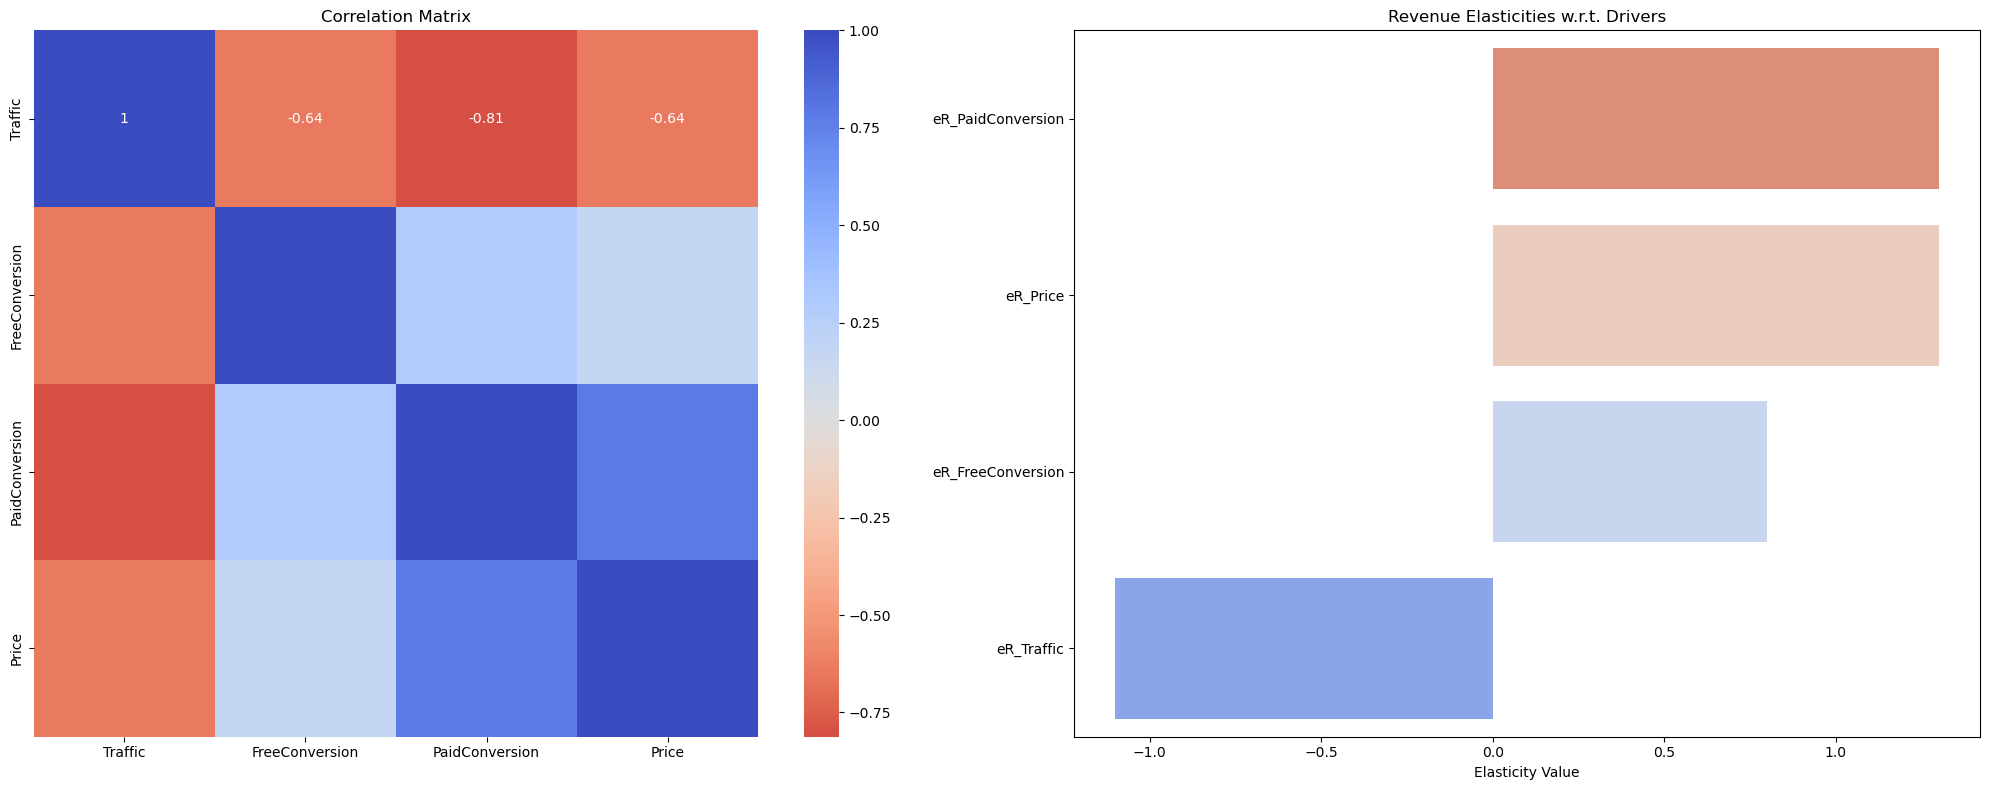

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def calculate_total_sensitivity_and_elasticity(traffic, free_conversion, paid_conversion, price, rho):
    """
    Calculate total sensitivity and elasticity of R with respect to traffic, free_conversion, paid_conversion, and price
    considering their Pearson correlation coefficients.
    
    Parameters:
    traffic (float): Value of traffic
    free_conversion (float): Value of free_conversion
    paid_conversion (float): Value of paid_conversion
    price (float): Value of price
    rho (pd.DataFrame): DataFrame of Pearson correlation coefficients
    
    Returns:
    dict: Total sensitivities and elasticities of R with respect to traffic, free_conversion, paid_conversion, and price
    """
    # Calculate partial derivatives (sensitivities)
    dR_dTraffic = free_conversion * paid_conversion * price * (1 + rho.loc['Traffic', 'FreeConversion'] + rho.loc['Traffic', 'PaidConversion'] + rho.loc['Traffic', 'Price'])
    dR_dFreeConversion = traffic * paid_conversion * price * (1 + rho.loc['FreeConversion', 'Traffic'] + rho.loc['FreeConversion', 'PaidConversion'] + rho.loc['FreeConversion', 'Price'])
    dR_dPaidConversion = traffic * free_conversion * price * (1 + rho.loc['PaidConversion', 'Traffic'] + rho.loc['PaidConversion', 'FreeConversion'] + rho.loc['PaidConversion', 'Price'])
    dR_dPrice = traffic * free_conversion * paid_conversion * (1 + rho.loc['Price', 'Traffic'] + rho.loc['Price', 'FreeConversion'] + rho.loc['Price', 'PaidConversion'])
    
    # Calculate R
    R = traffic * free_conversion * paid_conversion * price
    
    # Calculate elasticities
    eR_Traffic = (dR_dTraffic * traffic) / R
    eR_FreeConversion = (dR_dFreeConversion * free_conversion) / R
    eR_PaidConversion = (dR_dPaidConversion * paid_conversion) / R
    eR_Price = (dR_dPrice * price) / R

    # Calculate elasticities analytically from correlations
    eR_Traffic_analytical = 1 + rho.loc['Traffic', 'FreeConversion'] + rho.loc['Traffic', 'PaidConversion'] + rho.loc['Traffic', 'Price']
    eR_FreeConversion_analytical = 1 + rho.loc['FreeConversion', 'Traffic'] + rho.loc['FreeConversion', 'PaidConversion'] + rho.loc['FreeConversion', 'Price']
    eR_PaidConversion_analytical = 1 + rho.loc['PaidConversion', 'Traffic'] + rho.loc['PaidConversion', 'FreeConversion'] + rho.loc['PaidConversion', 'Price']
    eR_Price_analytical = 1 + rho.loc['Price', 'Traffic'] + rho.loc['Price', 'FreeConversion'] + rho.loc['Price', 'PaidConversion']

    # Confirm that the elasticities are equal
    assert round(eR_Traffic, 1) == round(eR_Traffic_analytical, 1), "Elasticities for Traffic do not match!"
    assert round(eR_FreeConversion, 1) == round(eR_FreeConversion_analytical, 1), "Elasticities for Free Conversion do not match!"
    assert round(eR_PaidConversion, 1) == round(eR_PaidConversion_analytical, 1), "Elasticities for Paid Conversion do not match!"
    assert round(eR_Price, 1) == round(eR_Price_analytical, 1), "Elasticities for Price do not match!"

    return {
        'sensitivities': {
            'dR_dTraffic': round(dR_dTraffic),
            'dR_dFreeConversion': round(dR_dFreeConversion),
            'dR_dPaidConversion': round(dR_dPaidConversion),
            'dR_dPrice': round(dR_dPrice)
        },
        'elasticities': {
            'eR_Traffic': round(eR_Traffic, 1),
            'eR_FreeConversion': round(eR_FreeConversion, 1),
            'eR_PaidConversion': round(eR_PaidConversion, 1),
            'eR_Price': round(eR_Price, 1)
        },
        'elasticities_analytical': {
            'eR_Traffic_analytical': round(eR_Traffic_analytical, 1),
            'eR_FreeConversion_analytical': round(eR_FreeConversion_analytical, 1),
            'eR_PaidConversion_analytical': round(eR_PaidConversion_analytical, 1),
            'eR_Price_analytical': round(eR_Price_analytical, 1)
        }
    }

# Example values
traffic = 150000
free_conversion = 0.02
paid_conversion = 0.03
price = 260

# # Pearson correlation coefficients
# rho_data = {
#     'Traffic': {'Traffic': 1, 'FreeConversion': 0.56, 'PaidConversion': -0.5, 'Price': 0},
#     'FreeConversion': {'Traffic': -0.5, 'FreeConversion': 1, 'PaidConversion': 0, 'Price': -0.2},
#     'PaidConversion': {'Traffic': -0.5, 'FreeConversion': 0, 'PaidConversion': 1, 'Price': 0},
#     'Price': {'Traffic': 0, 'FreeConversion': -0.2, 'PaidConversion': 0, 'Price': 1}
# }

rho = pd.DataFrame(rho_data)

# Calculate total sensitivities and elasticities
results = calculate_total_sensitivity_and_elasticity(traffic, free_conversion, paid_conversion, price, rho)

# Print the results with formatting
print("Total Sensitivity with respect to Traffic: ${:,}".format(results['sensitivities']['dR_dTraffic']))
print("Total Sensitivity with respect to Free Conversion: ${:,}".format(results['sensitivities']['dR_dFreeConversion']))
print("Total Sensitivity with respect to Paid Conversion: ${:,}".format(results['sensitivities']['dR_dPaidConversion']))
print("Total Sensitivity with respect to Price: ${:,}".format(results['sensitivities']['dR_dPrice']))

print()

print("Elasticity with respect to Traffic: {:.1f}".format(results['elasticities']['eR_Traffic']))
print("Elasticity with respect to Free Conversion: {:.1f}".format(results['elasticities']['eR_FreeConversion']))
print("Elasticity with respect to Paid Conversion: {:.1f}".format(results['elasticities']['eR_PaidConversion']))
print("Elasticity with respect to Price: {:.1f}".format(results['elasticities']['eR_Price']))

print()

print("Analytical Elasticity with respect to Traffic: {:.1f}".format(results['elasticities_analytical']['eR_Traffic_analytical']))
print("Analytical Elasticity with respect to Free Conversion: {:.1f}".format(results['elasticities_analytical']['eR_FreeConversion_analytical']))
print("Analytical Elasticity with respect to Paid Conversion: {:.1f}".format(results['elasticities_analytical']['eR_PaidConversion_analytical']))
print("Analytical Elasticity with respect to Price: {:.1f}".format(results['elasticities_analytical']['eR_Price_analytical']))

# Ensure the correlation matrix is symmetrical
for var1 in rho.columns:
    for var2 in rho.index:
        rho.loc[var1, var2] = rho.loc[var2, var1]

# Plot the correlation matrix and elasticities
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Correlation matrix
sns.heatmap(rho, annot=True, cmap='coolwarm_r', center=0, cbar=True, ax=axes[0])
axes[0].set_title('Correlation Matrix')

# Elasticities
elasticities = pd.Series(results['elasticities']).sort_values(ascending=False)
colors = sns.color_palette('coolwarm_r', n_colors=len(elasticities))
sns.barplot(x=elasticities.values, y=elasticities.index, palette=colors, ax=axes[1])
axes[1].set_title('Revenue Elasticities w.r.t. Drivers')
axes[1].set_xlabel('Elasticity Value')

plt.tight_layout()
plt.show()